In [1]:
# import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# display matplotlib graph's within notebook
%matplotlib inline 
import numpy as np
import os


np.set_printoptions(precision=3,suppress=True)

In [2]:
# Aufgabe 1
# Daten
points_size = 100
num_iters = 400
alpha = 0.01
J_history = np.zeros((num_iters, 1))

x_1 = np.random.uniform(0, 50, points_size)
x_2 = np.random.uniform(0, 50, points_size)
X = np.column_stack((x_1, x_2))
m = len(X)
X_norm = np.append(np.ones((m,1)), X, axis=1)
print("X_norm till 10: ", X_norm[:10])



theta = np.transpose(np.array([1.1, 2.0, 9]))
print("theta: ", theta)

X_norm till 10:  [[ 1.    15.002 39.722]
 [ 1.    21.151 27.651]
 [ 1.    42.449 44.968]
 [ 1.    28.238  7.34 ]
 [ 1.    10.242  7.574]
 [ 1.    12.584 40.597]
 [ 1.     6.424 36.552]
 [ 1.    35.873 49.531]
 [ 1.     2.176 39.558]
 [ 1.    11.239 17.056]]
theta:  [1.1 2.  9. ]


In [3]:
# Aufgabe 2
def linear_hypothesis(theta):
    def h(X):
        z = np.array([])
        for i in range(len(X_norm)):
            y = np.dot(np.transpose(theta), X_norm[i,:])
            z = np.append(z, y, None)
        return z
    return h

In [4]:
# Aufgabe 3
# a) Y
h = linear_hypothesis(theta)
y_pure = h(X_norm)
Y = y_pure + np.random.uniform(0, 10, points_size)
print("Y till 10: ", Y[:10])

Y till 10:  [396.347 299.108 491.946 124.428  96.287 399.393 351.705 525.949 370.334
 180.697]


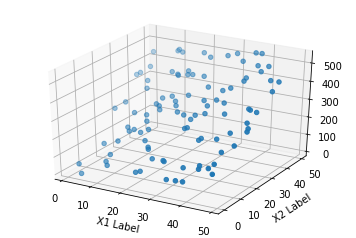

In [5]:
# b) Plotten ohne Scaling
fig = plt.figure("b")
ax = fig.gca(projection='3d')
ax.scatter(xs = X_norm[:,1], ys = X_norm[:,2], zs = Y)
ax.set_xlabel('X1 Label')
ax.set_ylabel('X2 Label')
plt.show()

In [6]:
# c) Feature scaling
# create array's of zeros for mean and standart deviation
X_norm = X
mu = np.zeros((1,np.size(X[:1])))
sigma = np.zeros((1,np.size(X[:1])))
# Normalize X data
for i in range(np.size(mu)):
    # Identify mean value for each dimension/column
    mu[:,i] = np.mean(X[:,i])
    # Identify standard deviation value for each dimension/column
    sigma[:,i] = np.std(X[:,i])
    # Set X_norm equal to the X normalized value ((value-meanValue)/standardDeviation)
    X_norm[:,i] = (X[:,i]-mu[:,i])/sigma[:,i]

In [7]:
# Print mit Scaling
X_norm = np.append(np.ones((m,1)), X_norm, axis=1)
print("X_norm till 10: ", X_norm[:10])

X_norm till 10:  [[ 1.    -0.768  0.96 ]
 [ 1.    -0.327  0.136]
 [ 1.     1.202  1.318]
 [ 1.     0.182 -1.251]
 [ 1.    -1.11  -1.235]
 [ 1.    -0.942  1.02 ]
 [ 1.    -1.384  0.744]
 [ 1.     0.73   1.63 ]
 [ 1.    -1.689  0.949]
 [ 1.    -1.038 -0.588]]


In [8]:
# Aufgabe 4
def cost_function(X_norm, y):
    def j(theta):
        J_cost = 0
        for j in range(m):
            J_cost = J_cost + ((1/(2*m))*np.square(np.dot(np.transpose(theta),np.transpose(X_norm[j,:]))-y[j]))
        return J_cost
    return j

In [9]:
# Aufgabe 5
# a)
def compute_new_theta (X_norm, Y, theta, alpha):
    h = linear_hypothesis(theta)
    theta_temp = theta - np.dot(np.transpose(X_norm), h(X_norm) - Y)*(alpha/m)
    return theta_temp

In [ ]:
# b), c)
def gradient_descent(alpha, theta, X_norm, Y):
    for i in range(num_iters):
        theta = compute_new_theta(X_norm, Y, theta, alpha)
        for j in range(m):
            j = cost_function(X_norm, Y)
            J_cost = j(theta)
            J_history[i] = J_cost
    return J_history, theta

In [ ]:
# Kosten plotten
theta_test = np.transpose(np.array([0, 0, 0]))
J_history, theta_result = gradient_descent(alpha, theta_test, X_norm, Y)
plt.plot(J_history)

In [ ]:
# test Before/After
print("Y_before till 10: ", Y[:10])
h = linear_hypothesis(theta_result)
Y_after = h(X_norm)
print("Y_after_gradient_descent till 10: ", Y_after[:10])

# test Normal equation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.c_[X_norm[:,0], X_norm[:, 1], Y]
X = X_norm
y = data[:,2]
xTx = X.T.dot(X)
XtX = np.linalg.inv(xTx)
XtX_xT = XtX.dot(X.T)
theta_normal = XtX_xT.dot(y)
h = linear_hypothesis(theta_normal)
Y_after_normal = h(X_norm)
print("Y_after_normal_equation till 10: ", Y_after_normal[:10])

In [ ]:
# Aufgabe 6

data = np.c_[X_norm[:, 1], X_norm[:, 2], Y_after]

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)
X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), np.linspace(mn[1], mx[1], 20))
Z = theta_result[1]*X + theta_result[2]*Y + theta_result[0]

fig1 =  plt.figure(figsize=(10, 10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
plt.xlabel('X')
plt.ylabel('Y')
ax.set_zlabel('Z')
ax.axis('equal')
ax.axis('tight')

In [ ]:
# Normal equation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = np.c_[X_norm[:,0], X_norm[:, 1], Y_after]
X = X_norm
y = data[:,2]
xTx = X.T.dot(X)
XtX = np.linalg.inv(xTx)
XtX_xT = XtX.dot(X.T)
theta_normal = XtX_xT.dot(y)
h = linear_hypothesis(theta_normal)
Y_after = h(X_norm)
print("Y_after till 10: ", Y_after[:10])